In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [8]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]



In [9]:
music

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1
5,197,9,1
6,294,29,0
7,382,22,1
8,102,10,1
9,264,24,0


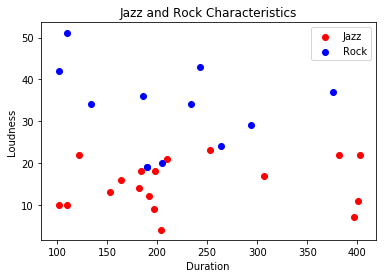

In [4]:

# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

### Challenge: Implement the Nearest Neighbor algorithm
The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. 

After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [66]:
import random


In [1]:
def train(X_train, y_train):
    # do nothing 
    return

In [17]:
X_train

,loudness,duration
18,21,210
27,11,401
24,34,234
23,23,253
21,18,198
5,9,197
25,19,190
19,22,403
14,7,397
17,12,192


In [26]:
def predict(X_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []
    for i in range(len(X_train)):
        # first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - X_train.iloc[i, :])))
        # add it to list of distances
        distances.append([distance, i])
    # sort the list
    distances = sorted(distances)
    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [27]:
def kNearestNeighbor(X_train, y_train, X_test, predictions, k):
    # train on the input data
    train(X_train, y_train)
    # loop over all observations
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test.iloc[i, :], k))

In [11]:
X = music[['loudness', 'duration']]
y = music.jazz

In [13]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


In [28]:
# making our predictions 
predictions = []

kNearestNeighbor(X_train, y_train, X_test, predictions, 7)

KeyError: 12